# Importing SUNRISE data using astropy

First, an example

In [2]:
import astropy
from astropy.io import fits
import pandas as pd
import numpy as np
import pickle

In [12]:
path = '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096.32/h329.cosmo50PLK.3072gst5HbwK1BH.004096.halo32.rvir.broadband.fits'

f = fits.open(path)

In [13]:
f

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fc19f0b1208>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc19f0b19b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fc19f0c2c50>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fc19f0bcf60>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fc19ef7d0f0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fc19ef89828>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fc19f0c6cc0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc19ef8c710>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc19ef9c320>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc19efac4e0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc19ef475f8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc19efb67f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc19ef41828>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc19ef4dcc0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc19ef50400>, <astropy.io.fits.hdu.imag

In [14]:
f.info()

Filename: /home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096.32/h329.cosmo50PLK.3072gst5HbwK1BH.004096.halo32.rvir.broadband.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1  BROADBAND     1 BinTableHDU     21   0R x 0C   []   
  2  CAMERA0-PARAMETERS    1 ImageHDU        33   (500, 500)   float32   
  3  CAMERA1-PARAMETERS    1 ImageHDU        33   (500, 500)   float32   
  4  CAMERA2-PARAMETERS    1 ImageHDU        33   (500, 500)   float32   
  5  CAMERA3-PARAMETERS    1 ImageHDU        33   (500, 500)   float32   
  6  CAMERA4-PARAMETERS    1 ImageHDU        33   (500, 500)   float32   
  7  GADGET        1 BinTableHDU     56   0R x 0C   []   
  8  INTEGRATED_QUANTITIES    1 BinTableHDU    107   968R x 24C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  MAKEGRID      1 B

In [16]:
data = f['filters'].data
data = pd.DataFrame(np.array(data).byteswap().newbyteorder())
# data.head()
data['filter']

0     b'FUV_GALEX.res                 '
1     b'NUV_GALEX.res                 '
2     b'u_SDSS.res                    '
3     b'g_SDSS.res                    '
4     b'r_SDSS.res                    '
5     b'i_SDSS.res                    '
6     b'z_SDSS.res                    '
7     b'H_2MASS.res                   '
8     b'J_2MASS.res                   '
9     b'Ks_2MASS.res                  '
10    b'IRAC1_SIRTF.res               '
11    b'IRAC2_SIRTF.res               '
12    b'IRAC3_SIRTF.res               '
13    b'IRAC4_SIRTF.res               '
14    b'MIPS160_SIRTF.res             '
15    b'MIPS24_SIRTF.res              '
16    b'MIPS70_SIRTF.res              '
17    b'ACS_F435_NEW.res              '
18    b'ACS_F606_NEW.res              '
19    b'ACS_F775_NEW.res              '
20    b'ACS_F850_NEW.res              '
21    b'B_Johnson.res                 '
22    b'V_Johnson.res                 '
23    b'R_Cousins.res                 '
24    b'I_Cousins.res                 '


### For all halos

Now, we can run the same thing for all the halos and get a dataset of SUNRISE-calculated magnitudes. 

In [61]:
bases = {'h329':'h329.cosmo50PLK.3072gst5HbwK1BH',
         'h242':'h242.cosmo50PLK.3072gst5HbwK1BH',
         'h229':'h229.cosmo50PLK.3072gst5HbwK1BH',
         'h148':'h148.cosmo50PLK.3072g3HbwK1BH'
        }
haloids = {'h329': [9,32],
           'h242': [11,30,33,39,45,72,76,85],
           'h229': [2,4,7,16,17,22],
           'h148': [10,11,12,14,126,18,2,23,26,28,3,30,31,36,5,57,6,64,738]
          }
print('sim','\t','id','\t','M_r')

with open('sunrise_mags.data','wb') as outfile: 
    for sim in ['h329','h242','h229','h148']:
        base = bases[sim]
        ids = haloids[sim]
        for i in ids:
            filename = f'/home/christenc/Data/Sims/{sim}.cosmo50PLK.3072g/{base}/{base}.004096/{base}.004096.{str(i)}/{base}.004096.halo{str(i)}.rvir.broadband.fits'



            with fits.open(filename) as f:
                data = f['FILTERS'].data

            names = list(data.dtype.names)

            df = pd.DataFrame(np.array(data).byteswap().newbyteorder())

            filters = np.char.strip(np.array(df['filter'],dtype=str))

            M_r = df.AB_mag0[filters=='r_SDSS.res'].iloc[0]
            #M_b = df.AB_mag0[filters=='b_SDSS.res'].iloc[0] # not able to load for every halo?
            M_g = df.AB_mag0[filters=='g_SDSS.res'].iloc[0]
            M_u = df.AB_mag0[filters=='u_SDSS.res'].iloc[0]
            M_i = df.AB_mag0[filters=='i_SDSS.res'].iloc[0]
            M_v = df.AB_mag0[filters=='V_Johnson.res'].iloc[0]
            print(sim, '\t', i, '\t', M_r)

            pickle.dump({
                'sim':sim,
                'haloid':i,
                'M_r':M_r,
                'M_g':M_g,
                'M_u':M_u,
                'M_i':M_i,
                'M_v':M_v
            },outfile,protocol=2)

sim 	 id 	 M_r
h329 	 9 	 -14.346393436755335
h329 	 32 	 -10.475249568031202
h242 	 11 	 -17.348893202875075
h242 	 30 	 -17.32381894566572
h242 	 33 	 -10.782912825554888
h242 	 39 	 -9.811301522532474
h242 	 45 	 -9.42186520413756
h242 	 72 	 -8.91437764967202
h242 	 76 	 -13.515337620785488
h242 	 85 	 -8.530969958790607
h229 	 2 	 -17.91384116259448
h229 	 4 	 -13.86611915409864
h229 	 7 	 -13.962862768473968
h229 	 16 	 -7.906931513648843
h229 	 17 	 -11.669357071045965
h229 	 22 	 -9.833275893479765
h148 	 10 	 -13.887726862361006
h148 	 11 	 -16.494628950707025
h148 	 12 	 -14.833877554668817
h148 	 14 	 -13.47797099814602
h148 	 126 	 -9.115879413892856
h148 	 18 	 -12.261699218411607
h148 	 2 	 -19.38016576883659
h148 	 23 	 -12.103389630742527
h148 	 26 	 -15.430821651553302
h148 	 28 	 -14.943050003185448
h148 	 3 	 -18.51880892019571
h148 	 30 	 -8.832485886940873
h148 	 31 	 -11.756362252019414
h148 	 36 	 -12.280753367321154
h148 	 5 	 -17.13990699956986
h148 	 57 	 -9.8

In [10]:
def read_file(path):
    data = []
    with open(path,'rb') as f:
        while True:
            try: 
                data.append(pickle.load(f, encoding='latin1'))
            except EOFError:
                break
    data = pd.DataFrame(data)

    return data

sunrise = read_file('sunrise_mags.data')
sunrise.head()

,M_g,M_i,M_r,M_u,M_v,haloid,sim
0,-13.843124,-14.531184,-14.346393,-12.826983,-14.147276,9,h329
1,-9.916128,-10.680508,-10.475250,-8.731997,-10.280956,32,h329
2,-16.731284,-17.601911,-17.348893,-15.483629,-17.117606,11,h242
3,-17.136700,-17.366294,-17.323819,-16.487657,-17.215654,30,h242
4,-10.192659,-10.999925,-10.782913,-8.985936,-10.576378,33,h242


### Compare to stellar masses calculated from pynbody

Since we have recently changed the definition of $R_{\mathrm{vir}}$, and thus changed the halo IDs, I have to load in old `.data` files. 

In [11]:
data = read_file('/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096.data')

for i,sim in zip(np.array(sunrise.haloid,dtype=int),sunrise.sim):
    if sim=='h148':
        if i not in np.array(data.haloid,dtype=int):
            print(f'Oh no! halo {i} not in .data file')
        else:
            pass


Now we join the stellar masses with the sunrise magnitude data

In [102]:
paths = {
    'h148':'/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096.data',
    'h229':'/home/akinshol/Data/Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096.data',
    'h242':'/home/akinshol/Data/Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096.data',
    'h329':'/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096.data'
}

mstars, mvirs = [], []
for sim, haloid in zip(np.array(sunrise.sim,dtype=str), np.array(sunrise.haloid,dtype=int)):
    
    data = read_file(paths[sim])
    data = data[data.haloid==haloid]
    
    mstars.append(float(data.M_star.iloc[0]))
    mvirs.append(float(data.mass.iloc[0]))
    

sunrise['mstar'] = mstars
sunrise['mvir'] = mvirs
    
sunrise.head()

,M_g,M_i,M_r,M_u,M_v,haloid,sim,mstar,mvir
0,-13.843124,-14.531184,-14.346393,-12.826983,-14.147276,9,h329,2.747402e+07,5.129210e+09
1,-9.916128,-10.680508,-10.475250,-8.731997,-10.280956,32,h329,1.491121e+06,1.473115e+09
2,-16.731284,-17.601911,-17.348893,-15.483629,-17.117606,11,h242,7.955153e+08,9.342336e+09
3,-17.136700,-17.366294,-17.323819,-16.487657,-17.215654,30,h242,5.322599e+07,7.091480e+09
4,-10.192659,-10.999925,-10.782913,-8.985936,-10.576378,33,h242,3.867941e+06,8.381912e+09


In [127]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(sunrise.mstar),sunrise.M_r)
x = np.linspace(np.min(np.log10(sunrise.mstar)), np.max(np.log10(sunrise.mstar)),10)
print(slope, intercept, r_value)

-2.736954827221663 6.320080547186681 -0.9811383461405586


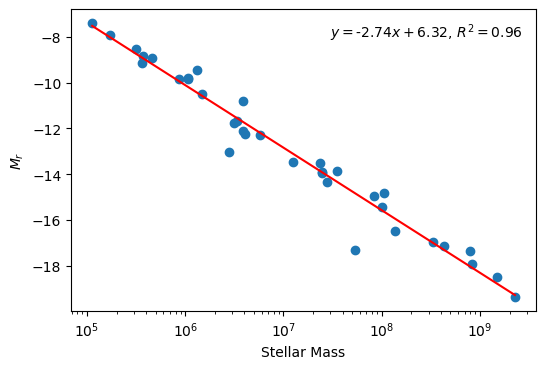

In [136]:
plt.figure(dpi=100)
plt.scatter(sunrise.mstar, sunrise.M_r)
plt.plot(10**x, slope*x + intercept, '-', c='r')
plt.xlabel('Stellar Mass')
plt.ylabel('$M_r$')
plt.semilogx()
plt.annotate(f'$y = ${slope:.2f}$x + ${intercept:.2f}, $R^2 = ${r_value**2:.2f}', (3e7, -8))
plt.show()

In [17]:
sunrise

,M_g,M_i,M_r,M_u,M_v,haloid,sim
0,-13.843124,-14.531184,-14.346393,-12.826983,-14.147276,9,h329
1,-9.916128,-10.680508,-10.475250,-8.731997,-10.280956,32,h329
2,-16.731284,-17.601911,-17.348893,-15.483629,-17.117606,11,h242
3,-17.136700,-17.366294,-17.323819,-16.487657,-17.215654,30,h242
4,-10.192659,-10.999925,-10.782913,-8.985936,-10.576378,33,h242
5,-9.231061,-10.014079,-9.811302,-8.045257,-9.610709,39,h242
6,-8.845319,-9.622197,-9.421865,-7.665043,-9.222904,45,h242
7,-8.339750,-9.115670,-8.914378,-7.161344,-8.715683,72,h242
8,-12.914443,-13.745466,-13.515338,-11.663573,-13.301604,76,h242
9,-7.954830,-8.733572,-8.530970,-6.774598,-8.331384,85,h242


In [33]:
def read_new_data(simname):
    data = []
    with open(f'/home/akinshol/Data/DataFiles/{simname}.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

def read_old_data(simname):
    paths = {'h148':'/home/akinshol/Data/Sims/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096.data',
            'h229': '/home/akinshol/Data/Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096.data',
            'h242': '/home/akinshol/Data/Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096.data',
            'h329': '/home/akinshol/Data/Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096.data'}
    data = []
    with open(paths[simname], 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [34]:
read_new_data('h148').haloid

0        1
1        2
2        3
3        5
4        6
5        9
6       10
7       11
8       13
9       14
10      21
11      24
12      27
13      28
14      30
15      32
16      36
17      37
18      41
19      45
20      47
21      48
22      58
23      61
24      65
25      68
26      80
27      81
28      96
29     105
30     119
31     127
32     128
33     136
34     163
35     212
36     265
37     278
38     283
39     329
40     372
41     377
42     384
43     386
44     442
45     491
46     620
47     678
48     699
49     711
50     759
51     914
52    1004
53    1024
54    1201
55    1217
56    1451
57    2905
58    5039
Name: haloid, dtype: int64

In [21]:
sunrise.haloid[sunrise.sim=='h148']

16     10
17     11
18     12
19     14
20    126
21     18
22      2
23     23
24     26
25     28
26      3
27     30
28     31
29     36
30      5
31     57
32      6
33     64
34    738
Name: haloid, dtype: int64

In [75]:
for sim in ['h148']:
    sunrise_temp = sunrise[sunrise.sim==sim]
    old_data = read_old_data(sim)
    new_data = read_new_data(sim)
    for old_id in sunrise_temp.haloid:
        if old_id in np.array(old_data.haloid,dtype=int):
            o = old_data[old_data.haloid==old_id]
            argmins = []
            argmins.append(np.argmin(np.abs(np.array(new_data.Xc,dtype=float) - float(o.Xc)/0.6776942783267969)))
            argmins.append(np.argmin(np.abs(np.array(new_data.Yc,dtype=float) - float(o.Yc)/0.6776942783267969)))
            argmins.append(np.argmin(np.abs(np.array(new_data.Zc,dtype=float) - float(o.Zc)/0.6776942783267969)))
            mode = int(stats.mode(argmins).mode[0])
            new_id = new_data.haloid.tolist()[mode]
            print(old_id, '\t', new_id, '\t', old_id - new_id)
        else:
            print(f'Sunrise ID {old_id} not found in Data File')
    

10 	 10 	 0
11 	 11 	 0
12 	 13 	 -1
14 	 14 	 0
126 	 127 	 -1
18 	 21 	 -3
2 	 10 	 -8
23 	 24 	 -1
26 	 27 	 -1
28 	 28 	 0
3 	 3 	 0
30 	 30 	 0
31 	 32 	 -1
36 	 14 	 22
5 	 5 	 0
57 	 61 	 -4
6 	 6 	 0
64 	 68 	 -4
738 	 759 	 -21


In [51]:
from scipy import stats


float(o.Xc)/0.6776942783267969, float(o.Yc)/0.6776942783267969, float(o.Zc)/0.6776942783267969

(25538.0752147567, 25176.446697964322, 24809.196446044705)

In [69]:
o = old_data[old_data.haloid==126]

argmins = []
argmins.append(np.argmin(np.abs(np.array(new_data.Xc,dtype=float) - float(o.Xc)/0.6776942783267969)))
argmins.append(np.argmin(np.abs(np.array(new_data.Yc,dtype=float) - float(o.Yc)/0.6776942783267969)))
argmins.append(np.argmin(np.abs(np.array(new_data.Zc,dtype=float) - float(o.Zc)/0.6776942783267969)))
mode = int(stats.mode(argmins).mode[0])

new_data.haloid.tolist()[mode]

127

In [73]:
738 in np.array(old_data.haloid,dtype=int)

True

In [96]:
for sim in ['h148']:
    old_data = read_old_data(sim)
    new_data = read_new_data(sim)
    for new_id in new_data.haloid:
        n = new_data[new_data.haloid==new_id]
        print(np.argmin(np.abs(np.array(old_data.Xc)/0.6776942783267969 - float(n.Xc))))

55
0
2
12
4
5
6
7
44
17
10
11
12
27
14
15
16
17
18
56
21
38
40
23
24
10
1
27
28
36
30
32
31
33
34
35
36
29
38
39
38
42
35
41
42
44
54
34
32
48
49
26
34
52
30
54
41
50
57


# Reversing the Matching Process

In [134]:
# match the new .data files to the old .data files
ids = np.array([2,3,5,6,9,10,11,13,14,21,27,28,32,36,37,45,61,68,80,96,128,163,265,278,283,329,386,10,12,24,30,40,41,78,80,439,480,20,22,23,27,53,55,73,113,212,549,11,33,133,137,447])
sims = np.array(['h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h148','h242','h242','h242','h242','h242','h242','h242','h242','h242','h242','h229','h229','h229','h229','h229','h229','h229','h229','h229','h229','h329','h329','h329','h329','h329'])

for sim in ['h148','h229','h242','h329']:
    old_data = read_old_data(sim)
    new_data = read_new_data(sim)
    for new_id in new_data.haloid:
        if new_id in ids[sims==sim]:
            n = new_data[new_data.haloid==new_id]
            
            Xdif = np.array(old_data.Xc,dtype=float)/0.6776942783267969 - float(n.Xc)
            Ydif = np.array(old_data.Yc,dtype=float)/0.6776942783267969 - float(n.Yc)
            Zdif = np.array(old_data.Zc,dtype=float)/0.6776942783267969 - float(n.Zc)
            dif = np.sqrt(Xdif*Xdif + Ydif*Ydif + Zdif*Zdif)
            argmin = np.argmin(dif)
            
            old_id = old_data.haloid.tolist()[argmin]
            print(sim,'\t', new_id, '\t', old_id, '\t', old_id - new_id)


h148 	 2 	 2 	 0
h148 	 3 	 3 	 0
h148 	 5 	 5 	 0
h148 	 6 	 6 	 0
h148 	 9 	 9 	 0
h148 	 10 	 10 	 0
h148 	 11 	 11 	 0
h148 	 13 	 12 	 -1
h148 	 14 	 14 	 0
h148 	 21 	 18 	 -3
h148 	 27 	 26 	 -1
h148 	 28 	 28 	 0
h148 	 32 	 31 	 -1
h148 	 36 	 34 	 -2
h148 	 37 	 36 	 -1
h148 	 45 	 42 	 -3
h148 	 61 	 57 	 -4
h148 	 68 	 64 	 -4
h148 	 80 	 77 	 -3
h148 	 96 	 94 	 -2
h148 	 128 	 125 	 -3
h148 	 163 	 160 	 -3
h148 	 265 	 252 	 -13
h148 	 278 	 264 	 -14
h148 	 283 	 271 	 -12
h148 	 329 	 304 	 -25
h148 	 386 	 372 	 -14
h229 	 20 	 17 	 -3
h229 	 22 	 21 	 -1
h229 	 23 	 22 	 -1
h229 	 27 	 27 	 0
h229 	 53 	 51 	 -2
h229 	 55 	 52 	 -3
h229 	 73 	 70 	 -3
h229 	 113 	 104 	 -9
h229 	 212 	 203 	 -9
h229 	 549 	 553 	 4
h242 	 10 	 9 	 -1
h242 	 12 	 11 	 -1
h242 	 24 	 24 	 0
h242 	 30 	 29 	 -1
h242 	 40 	 39 	 -1
h242 	 41 	 40 	 -1
h242 	 78 	 75 	 -3
h242 	 80 	 76 	 -4
h242 	 439 	 425 	 -14
h242 	 480 	 457 	 -23
h329 	 11 	 9 	 -2
h329 	 33 	 32 	 -1
h329 	 133 	 

In [106]:
sunrise

,M_g,M_i,M_r,M_u,M_v,haloid,sim
0,-13.843124,-14.531184,-14.346393,-12.826983,-14.147276,9,h329
1,-9.916128,-10.680508,-10.475250,-8.731997,-10.280956,32,h329
2,-16.731284,-17.601911,-17.348893,-15.483629,-17.117606,11,h242
3,-17.136700,-17.366294,-17.323819,-16.487657,-17.215654,30,h242
4,-10.192659,-10.999925,-10.782913,-8.985936,-10.576378,33,h242
5,-9.231061,-10.014079,-9.811302,-8.045257,-9.610709,39,h242
6,-8.845319,-9.622197,-9.421865,-7.665043,-9.222904,45,h242
7,-8.339750,-9.115670,-8.914378,-7.161344,-8.715683,72,h242
8,-12.914443,-13.745466,-13.515338,-11.663573,-13.301604,76,h242
9,-7.954830,-8.733572,-8.530970,-6.774598,-8.331384,85,h242


In [133]:
old_data = read_old_data('h148')
new_data = read_new_data('h148')
old_id = 2
new_id = 2
print(len(old_data[old_data.haloid==old_id]))

print(float(old_data[old_data.haloid==old_id].Xc / 0.6776942783267969) - float(new_data[new_data.haloid==new_id].Xc))
print(float(old_data[old_data.haloid==old_id].Yc / 0.6776942783267969) - float(new_data[new_data.haloid==new_id].Yc))
print(float(old_data[old_data.haloid==old_id].Zc / 0.6776942783267969) - float(new_data[new_data.haloid==new_id].Zc))
print(float(old_data[old_data.haloid==old_id].M_star)- float(new_data[new_data.haloid==new_id].M_star))

1
-2.778445665277104
-2.4193088719148363
-2.7269793756604486
59894.39068889618


# Comparing SUNRISE magnitudes to actual stellar masses/

In [172]:
matched_ids = pd.read_csv('sunrise_match.csv')
matched_ids = matched_ids[matched_ids['do we have sunrise data?']=='Yes']

matched_ids['key'] = [str(sim)+'-'+str(i) for sim,i in zip(matched_ids['simulation'], matched_ids['matched old id'])]
matched_ids

,simulation,200 bgk dens ID,matched old id,id difference,do we have sunrise data?,key
0,h148,2,2,0,Yes,h148-2
1,h148,3,3,0,Yes,h148-3
2,h148,5,5,0,Yes,h148-5
3,h148,6,6,0,Yes,h148-6
5,h148,10,10,0,Yes,h148-10
6,h148,11,11,0,Yes,h148-11
7,h148,13,12,-1,Yes,h148-12
8,h148,14,14,0,Yes,h148-14
9,h148,21,18,-3,Yes,h148-18
10,h148,27,26,-1,Yes,h148-26


In [175]:
sunrise['key'] = [str(sim)+'-'+str(i) for sim,i in zip(sunrise['sim'], sunrise['haloid'])]
merged = pd.merge(matched_ids, sunrise, left_on='key', right_on='key')

merged['key'] = [str(sim)+'-'+str(i) for sim,i in zip(merged['sim'], merged['200 bgk dens ID'])]
merged

,simulation,200 bgk dens ID,matched old id,id difference,do we have sunrise data?,key,M_g,M_i,M_r,M_u,M_v,haloid,sim
0,h148,2,2,0,Yes,h148-2,-19.006667,-19.526333,-19.380166,-18.051331,-19.213652,2,h148
1,h148,3,3,0,Yes,h148-3,-18.071981,-18.705120,-18.518809,-17.057268,-18.335558,3,h148
2,h148,5,5,0,Yes,h148-5,-16.723978,-17.307755,-17.139907,-15.746194,-16.968644,5,h148
3,h148,6,6,0,Yes,h148-6,-16.573120,-17.092861,-16.945385,-15.662628,-16.783981,6,h148
4,h148,10,10,0,Yes,h148-10,-13.435007,-14.069254,-13.887727,-12.402113,-13.713870,10,h148
5,h148,11,11,0,Yes,h148-11,-16.207684,-16.602673,-16.494629,-15.369102,-16.364633,11,h148
6,h148,13,12,-1,Yes,h148-13,-14.190606,-15.078250,-14.833878,-12.915137,-14.604174,12,h148
7,h148,14,14,0,Yes,h148-14,-13.068797,-13.656438,-13.477971,-12.019128,-13.328127,14,h148
8,h148,21,18,-3,Yes,h148-21,-11.843441,-12.436491,-12.261699,-10.733548,-12.112513,18,h148
9,h148,27,26,-1,Yes,h148-27,-14.928492,-15.633196,-15.430822,-13.840093,-15.240207,26,h148


In [176]:
def read_file(simname):
    ### leave this section as is
    data = []
    with open('/home/akinshol/Data/DataFiles/'+ simname + '.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

        data1 = pd.DataFrame(data)
        data1['sim'] = [simname]*len(data1)
        data1['key'] = [str(sim)+'-'+str(i) for sim,i in zip(data1['sim'], data1['haloid'])]
        return data1
    
data = read_file('h148')
for simname in ['h229','h242','h329']:
    data = data.append(read_file(simname))

data.head()

,B-V,B_mag,G_inflow_0,G_inflow_1.5,G_inflow_2.5,G_outflow_0,G_outflow_1.5,G_outflow_2.5,Gin_T,Gout_T,...,n_star,ovdens,sSFR,sfh,sfhbins,tquench,zgas,zstar,sim,key
0,0.477356,-22.19983500305993,-9.931832,-11.298216,-13.556927,2.597504,4.189220,4.924522,719478.641308,798037.361857,...,37915400,200.00,8.27837e-11,"[0.023299285608059647, 0.0844882043439499, 0.0...","[-0.4749166097474818, -0.3633944368651033, -0....",1.50642531204565,0.02215582988628723,0.03104892348309388,h148,h148-1
1,0.371491,-18.435592508680724,-0.000272,-2.723498,-0.884490,0.042432,2.564586,0.455940,10812.622961,15970.594921,...,435389,674.76,2.10278e-10,"[0.006509142179393505, 0.007263847883276302, 0...","[0.4572397126804572, 0.5614794142938675, 0.665...",0.5741943370072953,0.007270488627656683,0.004472060825427019,h148,h148-2
2,0.548374,-17.203064157628305,-0.000962,-0.709282,-0.180351,0.000632,0.249198,0.102553,9165.848486,11688.649100,...,295443,200.00,6.3337e-11,"[8.942997546084503e-05, 0.009130772210419533, ...","[0.2560599417148547, 0.3618713602889337, 0.467...",1.535141547457684,0.00964738880550886,0.004456216249399801,h148,h148-3
3,0.556408,-15.946534929041006,-0.000055,-0.133621,-0.038735,0.015812,0.162542,0.048706,7949.622895,12313.418384,...,85749,377.59,5.68776e-11,"[0.010595563956347167, 0.023570771110999835, 0...","[0.48501768822951974, 0.589040374408953, 0.693...",1.7172503000941859,0.006697807493436183,0.00260866737742371,h148,h148-5
4,0.496545,-15.901122671161803,0.000000,-0.072399,-0.015417,0.001738,0.155636,0.050430,8559.505570,11944.090424,...,65528,200.00,1.06791e-10,"[0.009258680886500477, 0.010602669526616919, 0...","[0.4412463351760778, 0.545610985051241, 0.6499...",1.4097987514482426,0.0052344350859766684,0.002241363743679699,h148,h148-6


In [177]:
all_data = pd.merge(merged, data, left_on='key', right_on='key')
all_data.keys()

Index(['simulation', '200 bgk dens ID', 'matched old id', 'id difference',
       'do we have sunrise data?', 'key', 'M_g', 'M_i', 'M_r', 'M_u', 'M_v',
       'haloid_x', 'sim_x', 'B-V', 'B_mag', 'G_inflow_0', 'G_inflow_1.5',
       'G_inflow_2.5', 'G_outflow_0', 'G_outflow_1.5', 'G_outflow_2.5',
       'Gin_T', 'Gout_T', 'HIgasfrac', 'I_mag', 'M_gas', 'M_star', 'R_mag',
       'Rmax', 'Rvir', 'SFR', 'U_mag', 'V90_Vdisp', 'V_mag', 'Xc', 'Yc', 'Zc',
       'a', 'age', 'c', 'c_a', 'fMhires', 'feh', 'g_temp', 'gasfrac', 'h1dist',
       'haloid_y', 'hostDist', 'hostHalo', 'hostVirialR', 'id2', 'mHI', 'mass',
       'n_gas', 'n_particles', 'n_star', 'ovdens', 'sSFR', 'sfh', 'sfhbins',
       'tquench', 'zgas', 'zstar', 'sim_y'],
      dtype='object')

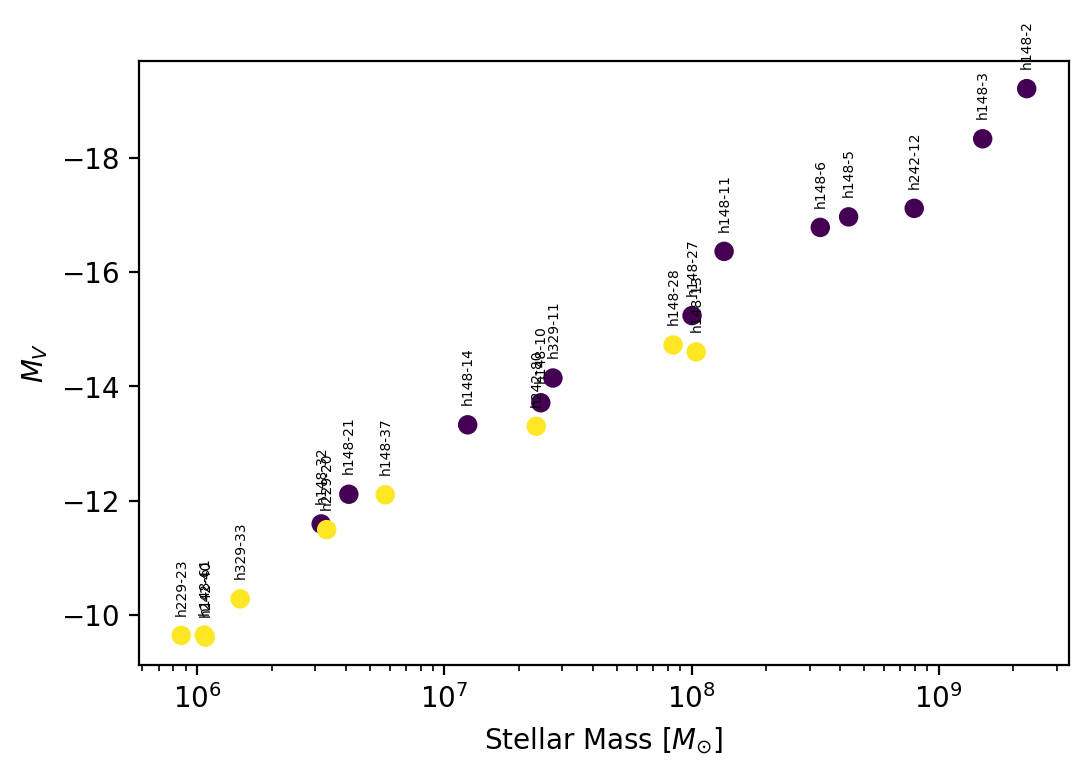

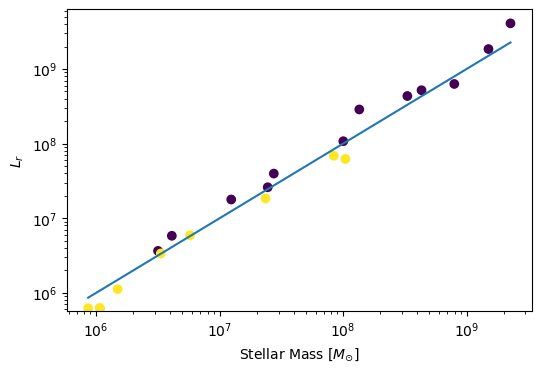

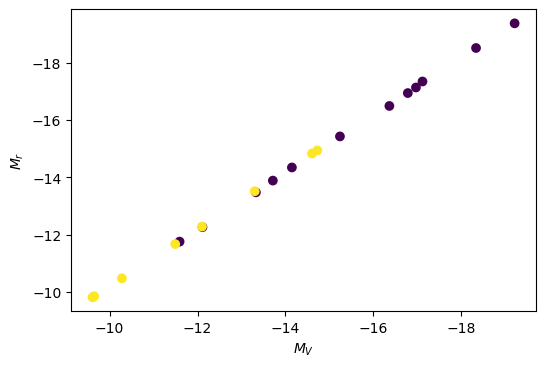

In [229]:
V = np.array(all_data['M_v'])
r = np.array(all_data['M_r'])
Mstar = np.array(all_data['M_star'], dtype=float)
quenched = np.array(np.array(all_data['sSFR']) < 1e-11, dtype=bool)

import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.scatter(Mstar, V, c=quenched)
plt.semilogx()
plt.gca().invert_yaxis()

for i, key in enumerate(all_data['key']):
        plt.gca().annotate(key, (Mstar[i]*0.94, V[i]-0.4), size=5,rotation=90)


plt.xlabel(r'Stellar Mass [$M_{\odot}$]')
plt.ylabel(r'$M_V$')
plt.show()


Mr_sol = 4.65 # AB mag of sun in sdss r band
L = 10**((Mr_sol - r)/2.5)




plt.figure(dpi=100)
plt.plot([np.min(Mstar),np.max(Mstar)],[np.min(Mstar),np.max(Mstar)])
plt.scatter(Mstar, L, c=quenched)
plt.loglog()
plt.xlabel(r'Stellar Mass [$M_{\odot}$]')
plt.ylabel(r'$L_r$')
plt.show()



plt.figure(dpi=100)
plt.scatter(V, r, c=quenched)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel(r'$M_V$')
plt.ylabel(r'$M_r$')
plt.show()

1.5880616843621038 -54135150.26600271


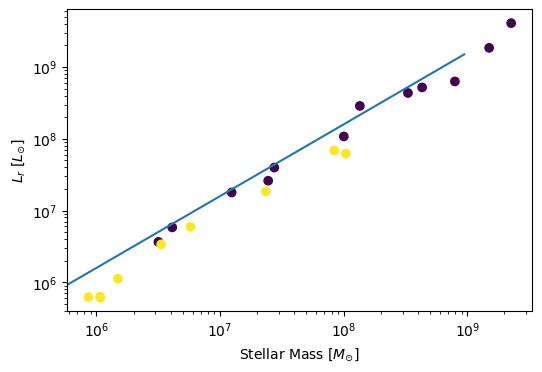

1.0406114271573241

In [225]:
Mr_sol = 4.65 # AB mag of sun in sdss r band
L = 10**((Mr_sol - r)/2.5)

slope, yint = np.polyfit(Mstar, L, deg=1)
x = np.array([1e6, 1e9]) +yint
print(slope, yint)

plt.figure(dpi=100)
plt.scatter(Mstar, L, c=quenched)
plt.plot(x, slope*x)
plt.loglog()
plt.xlabel(r'Stellar Mass [$M_{\odot}$]')
plt.ylabel(r'$L_r$ [$L_{\odot}$]')
plt.show()

np.mean(Mstar/L)


In [185]:
def read_new_data():
    '''Function to read in the resulting data file which contains quenching and infall times'''
    data = []
    with open('/home/akinshol/Data/Timescales/QuenchingTimescales_sSFR_F19.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [187]:

new_data = read_new_data()
new_data['key'] = [str(sim)+'-'+str(i) for sim, i in zip(new_data['sim'], new_data['haloid'])]

Fig5data = pd.merge(new_data, merged, left_on='key', right_on='key')



,M_star,haloid_x,n_star,quenched,sim_x,tinfall,tinfall_lower,tinfall_upper,tquench,tquench_lower,...,matched old id,id difference,do we have sunrise data?,M_g,M_i,M_r,M_u,M_v,haloid_y,sim_y
0,2.268773e+09,2,435389,False,h148,1.723922e+00,2.154902,1.723922,NaN,NaN,...,2,0,Yes,-19.006667,-19.526333,-19.380166,-18.051331,-19.213652,2,h148
1,1.505383e+09,3,295443,False,h148,4.309804e+00,4.740784,4.309804,NaN,NaN,...,3,0,Yes,-18.071981,-18.705120,-18.518809,-17.057268,-18.335558,3,h148
2,4.317847e+08,5,85749,False,h148,2.585882e+00,3.033698,2.154902,NaN,NaN,...,5,0,Yes,-16.723978,-17.307755,-17.139907,-15.746194,-16.968644,5,h148
3,3.315968e+08,6,65528,False,h148,2.585882e+00,3.033698,2.585882,NaN,NaN,...,6,0,Yes,-16.573120,-17.092861,-16.945385,-15.662628,-16.783981,6,h148
4,2.452897e+07,10,4919,False,h148,2.450751e-10,0.430980,NaN,NaN,NaN,...,10,0,Yes,-13.435007,-14.069254,-13.887727,-12.402113,-13.713870,10,h148
5,1.353323e+08,11,26093,False,h148,6.033725e+00,6.033725,5.602745,NaN,NaN,...,11,0,Yes,-16.207684,-16.602673,-16.494629,-15.369102,-16.364633,11,h148
6,1.043767e+08,13,21027,True,h148,6.033725e+00,6.033725,5.602745,4.784019,NaN,...,12,-1,Yes,-14.190606,-15.078250,-14.833878,-12.915137,-14.604174,12,h148
7,1.241519e+07,14,2459,False,h148,1.292941e+00,1.649847,0.861961,NaN,NaN,...,14,0,Yes,-13.068797,-13.656438,-13.477971,-12.019128,-13.328127,14,h148
8,4.102691e+06,21,815,False,h148,1.723922e+00,1.723922,1.292941,NaN,NaN,...,18,-3,Yes,-11.843441,-12.436491,-12.261699,-10.733548,-12.112513,18,h148
9,1.004160e+08,27,20102,False,h148,7.326666e+00,7.326666,7.326666,NaN,NaN,...,26,-1,Yes,-14.928492,-15.633196,-15.430822,-13.840093,-15.240207,26,h148


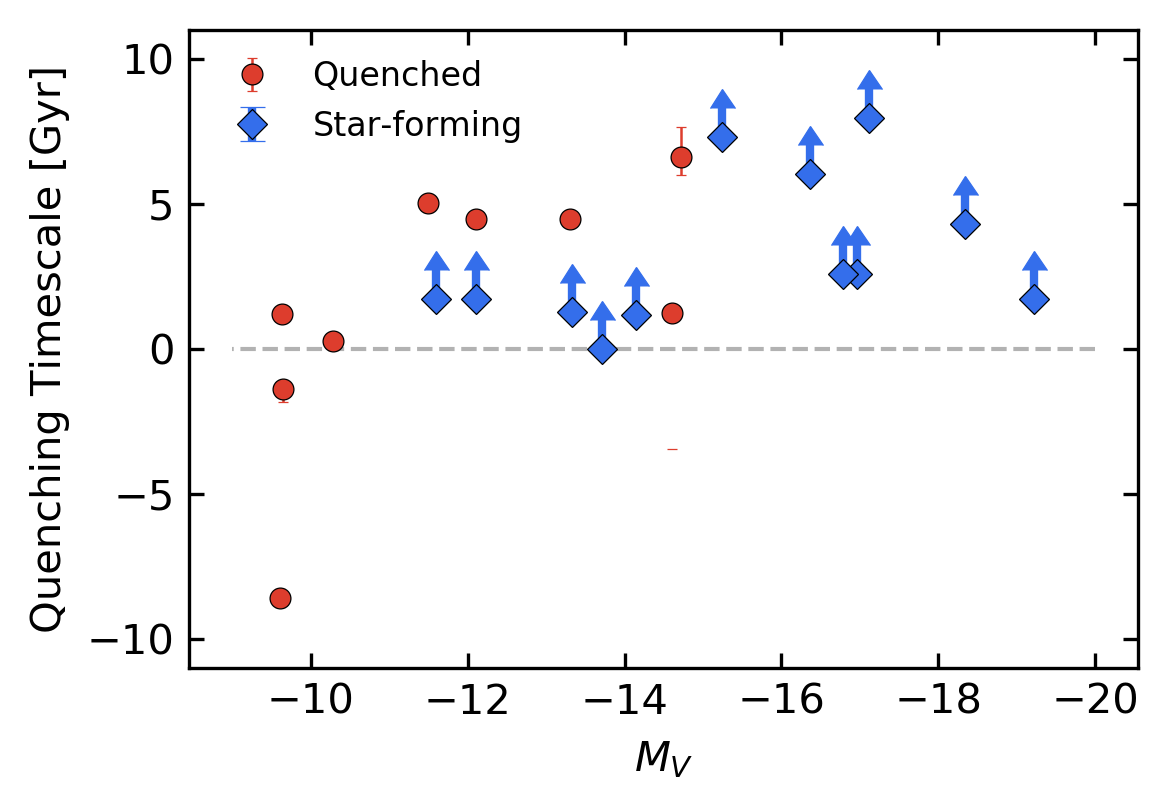

In [193]:
data = Fig5data
data = data[(~np.isnan(np.array(data.tinfall,dtype=float)))&(data.n_star > 100)]

tinfall = np.array(data.tinfall, dtype=float)
tinfall_upper_error = np.abs(np.array(data.tinfall_upper, dtype=float) - tinfall)
tinfall_lower_error = np.abs(np.array(data.tinfall_lower, dtype=float) - tinfall)

tquench = np.array(data.tquench, dtype=float)
tquench_upper_error = np.abs(np.array(data.tquench_lower, dtype=float) - tquench) # flipped intentionally
tquench_lower_error = np.abs(np.array(data.tquench_upper, dtype=float) - tquench)

tau_upper_err = np.sqrt(tquench_upper_error**2 + tinfall_upper_error**2)
tau_lower_err = np.sqrt(tquench_lower_error**2 + tinfall_lower_error**2)

fig, ax = plt.subplots(1,1,figsize=(4,2.8),dpi=300)

timescale = tinfall - tquench

q = np.array(data.quenched,dtype=bool)

p1 = ax.errorbar(data.M_v[q],timescale[q],
            yerr = np.array([tau_lower_err[q], tau_upper_err[q]]),
            elinewidth=0.6,
            mec = 'k', 
            mew = 0.3,
            ecolor='#DD3D2D',
            capsize=1.2,
            capthick=0.6,
            fmt='o', 
            color = '#DD3D2D',
            ms = 5,
            zorder=1)#, label='Quenched')



p3 = ax.errorbar(data.M_v[~q], tinfall[~q],
            yerr = [1]*len(tinfall[~q]),
            elinewidth=2,
            mec = 'k', 
            mew = 0.3,
            ecolor='#346eeb',
            capsize=3,
            capthick=2,
            fmt='D',
            color = '#346eeb',
            ms = 5,
            lolims=True,
            zorder=1)#, label='Star-forming')



# zero line
ax.plot([-20, -9], [0,0], 'k--', linewidth=1, alpha=0.3, zorder=0)


ax.legend([p1,p3],['Quenched', 'Star-forming'], loc='upper left', frameon=False, prop={'size':8})


ax.set_ylim(-11, 11)
# ax.set_ylim(-14,3)

ax.set_xlabel(r'$M_V$')
ax.set_ylabel('Quenching Timescale [Gyr]')
ax.invert_xaxis()

ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.tight_layout()

plt.show()

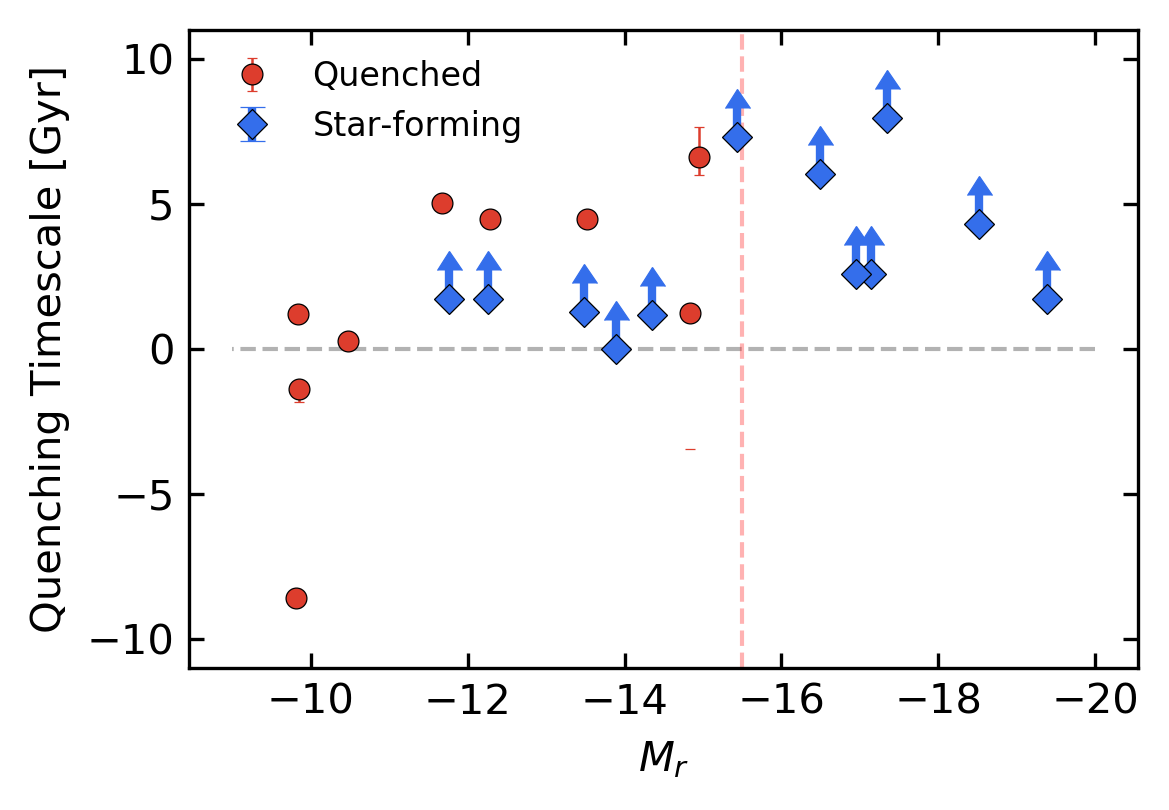

In [232]:
data = Fig5data
data = data[(~np.isnan(np.array(data.tinfall,dtype=float)))&(data.n_star > 100)]

tinfall = np.array(data.tinfall, dtype=float)
tinfall_upper_error = np.abs(np.array(data.tinfall_upper, dtype=float) - tinfall)
tinfall_lower_error = np.abs(np.array(data.tinfall_lower, dtype=float) - tinfall)

tquench = np.array(data.tquench, dtype=float)
tquench_upper_error = np.abs(np.array(data.tquench_lower, dtype=float) - tquench) # flipped intentionally
tquench_lower_error = np.abs(np.array(data.tquench_upper, dtype=float) - tquench)

tau_upper_err = np.sqrt(tquench_upper_error**2 + tinfall_upper_error**2)
tau_lower_err = np.sqrt(tquench_lower_error**2 + tinfall_lower_error**2)

fig, ax = plt.subplots(1,1,figsize=(4,2.8),dpi=300)

timescale = tinfall - tquench

q = np.array(data.quenched,dtype=bool)

p1 = ax.errorbar(data.M_r[q],timescale[q],
            yerr = np.array([tau_lower_err[q], tau_upper_err[q]]),
            elinewidth=0.6,
            mec = 'k', 
            mew = 0.3,
            ecolor='#DD3D2D',
            capsize=1.2,
            capthick=0.6,
            fmt='o', 
            color = '#DD3D2D',
            ms = 5,
            zorder=1)#, label='Quenched')



p3 = ax.errorbar(data.M_r[~q], tinfall[~q],
            yerr = [1]*len(tinfall[~q]),
            elinewidth=2,
            mec = 'k', 
            mew = 0.3,
            ecolor='#346eeb',
            capsize=3,
            capthick=2,
            fmt='D',
            color = '#346eeb',
            ms = 5,
            lolims=True,
            zorder=1)#, label='Star-forming')



# zero line
ax.plot([-20, -9], [0,0], 'k--', linewidth=1, alpha=0.3, zorder=0)
ax.plot([-15.5, -15.5], [-11,11], 'r--', linewidth=1, alpha=0.3, zorder=0)



ax.legend([p1,p3],['Quenched', 'Star-forming'], loc='upper left', frameon=False, prop={'size':8})


ax.set_ylim(-11, 11)
# ax.set_ylim(-14,3)

ax.set_xlabel(r'$M_r$')
ax.set_ylabel('Quenching Timescale [Gyr]')
ax.invert_xaxis()

ax.tick_params(direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.tight_layout()

plt.show()

In [234]:
Mr_sol = 4.65 # AB mag of sun in sdss r band
Mr = -15.5
L = 10**((Mr_sol - Mr)/2.5)
print(f'{L:.2e}')

1.15e+08


In [235]:
sunrise

,M_g,M_i,M_r,M_u,M_v,haloid,sim,key
0,-13.843124,-14.531184,-14.346393,-12.826983,-14.147276,9,h329,h329-9
1,-9.916128,-10.680508,-10.475250,-8.731997,-10.280956,32,h329,h329-32
2,-16.731284,-17.601911,-17.348893,-15.483629,-17.117606,11,h242,h242-11
3,-17.136700,-17.366294,-17.323819,-16.487657,-17.215654,30,h242,h242-30
4,-10.192659,-10.999925,-10.782913,-8.985936,-10.576378,33,h242,h242-33
5,-9.231061,-10.014079,-9.811302,-8.045257,-9.610709,39,h242,h242-39
6,-8.845319,-9.622197,-9.421865,-7.665043,-9.222904,45,h242,h242-45
7,-8.339750,-9.115670,-8.914378,-7.161344,-8.715683,72,h242,h242-72
8,-12.914443,-13.745466,-13.515338,-11.663573,-13.301604,76,h242,h242-76
9,-7.954830,-8.733572,-8.530970,-6.774598,-8.331384,85,h242,h242-85


In [236]:
bases = {'h329':'h329.cosmo50PLK.3072gst5HbwK1BH',
         'h242':'h242.cosmo50PLK.3072gst5HbwK1BH',
         'h229':'h229.cosmo50PLK.3072gst5HbwK1BH',
         'h148':'h148.cosmo50PLK.3072g3HbwK1BH'
        }
haloids = {'h329': [1],
           'h242': [1],
           'h229': [1],
           'h148': [1]
          }
print('sim','\t','id','\t','M_r')

with open('sunrise_halo1.data','wb') as outfile: 
    for sim in ['h329','h242','h229','h148']:
        base = bases[sim]
        ids = haloids[sim]
        for i in ids:
            filename = f'/home/christenc/Data/Sims/{sim}.cosmo50PLK.3072g/{base}/{base}.004096/{base}.004096.{str(i)}/{base}.004096.halo{str(i)}.rvir.broadband.fits'



            with fits.open(filename) as f:
                data = f['FILTERS'].data

            names = list(data.dtype.names)

            df = pd.DataFrame(np.array(data).byteswap().newbyteorder())

            filters = np.char.strip(np.array(df['filter'],dtype=str))

            M_r = df.AB_mag0[filters=='r_SDSS.res'].iloc[0]
            #M_b = df.AB_mag0[filters=='b_SDSS.res'].iloc[0] # not able to load for every halo?
            M_g = df.AB_mag0[filters=='g_SDSS.res'].iloc[0]
            M_u = df.AB_mag0[filters=='u_SDSS.res'].iloc[0]
            M_i = df.AB_mag0[filters=='i_SDSS.res'].iloc[0]
            M_v = df.AB_mag0[filters=='V_Johnson.res'].iloc[0]
            print(sim, '\t', i, '\t', M_r)

            pickle.dump({
                'sim':sim,
                'haloid':i,
                'M_r':M_r,
                'M_g':M_g,
                'M_u':M_u,
                'M_i':M_i,
                'M_v':M_v
            },outfile,protocol=2)

sim 	 id 	 M_r


FileNotFoundError: [Errno 2] No such file or directory: '/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096.1/h329.cosmo50PLK.3072gst5HbwK1BH.004096.halo1.rvir.broadband.fits'